In [51]:
import numpy as np
import pandas as pd
import pokemontcgsdk
import pickle
import os

from datetime import datetime
todate = datetime.today().strftime('%Y-%m-%d')
print(todate)

from random import randrange

from PIL import Image
import requests
from io import BytesIO

2025-04-22


In [17]:
def update(filename: str = 'all-cards'):
    all_cards = pokemontcgsdk.Card.all()
    todate = datetime.today().strftime('%Y-%m-%d')
    print(f'Today date: {todate}')
    all_cards_file = open(filename + '-' + todate + '.pkl', 'wb')
    pickle.dump(all_cards, all_cards_file)
    all_cards_file.close()
    print('Update completed!')

def load_pkl(filename: str):
    with open(filename, 'rb') as file:
        loaded_data = pickle.load(file)
    return loaded_data

In [ ]:
# update()

Today date: 2025-04-22
Update completed!


In [18]:
all_cards = load_pkl('all-cards-2025-04-22.pkl')

In [20]:
type(all_cards)

list

In [19]:
len(all_cards)

18876

In [29]:
def random_card(all_cards: list, pic: bool = False) -> pokemontcgsdk.Card:
    l = len(all_cards)
    n = randrange(l)
    target = all_cards[n]
    img_url = target.images.small
    response = requests.get(img_url)
    display(Image.open(BytesIO(response.content)))
    return all_cards[n]

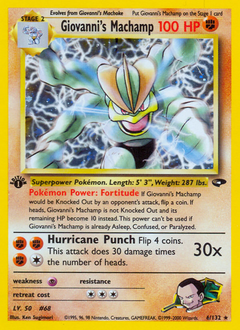

Card(abilities=[Ability(name='Fortitude', text="If Giovanni's Machamp would be Knocked Out by an opponent's attack, flip a coin. If heads, Giovanni's Machamp is not Knocked Out and its remaining HP become 10 instead. This power can't be used if Giovanni's Machamp is already Asleep, Confused, or Paralyzed.", type='Pokémon Power')], artist='Ken Sugimori', ancientTrait=None, attacks=[Attack(name='Hurricane Punch', cost=['Fighting', 'Fighting', 'Fighting', 'Colorless'], convertedEnergyCost=4, damage='30×', text='Flip 4 coins. This attack does 30 damage times the number of heads.')], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/gym2-6', updatedAt='2025/04/22', prices=CardmarketPrices(averageSellPrice=74.92, lowPrice=7.0, trendPrice=64.72, germanProLow=0.0, suggestedPrice=0.0, reverseHoloSell=0.0, reverseHoloLow=0.0, reverseHoloTrend=26.18, lowPriceExPlus=46.0, avg1=24.0, avg7=83.21, avg30=56.32, reverseHoloAvg1=26.99, reverseHoloAvg7=29.93, reverseHoloAvg30=26.04)), co

In [39]:
random_card(all_cards, True)

In [80]:
def save_img(card: pokemontcgsdk.Card, verbose: bool = False):
    img_url = card.images.small
    response = requests.get(img_url)
    img = response.content
    set_id, filename = card.id.split('-')
    set_id = 'dataset\\' + set_id
    # filename.replace('?')
    if not os.path.exists(set_id):
        os.makedirs(set_id)

     # Define the full path for the image file
    file_path = os.path.join(set_id, f"{filename}.png")
    
    # Check if the image already exists
    if os.path.exists(file_path):
        if verbose:
            print(f'Image already exists: {file_path}')
        return  # Skip saving if the image already exists
    
    try:
        with open(set_id + '\\' + filename + '.png', 'wb') as handler:
            handler.write(img)
        if verbose:
            print(f'Image saved as {set_id + '\\' + filename + '.png'}')
    except OSError as e:
        print(f'Error saving image {file_path}: {e} with id {set_id + '-' + filename.split('.')[0]}')

def save_all_img(all_cards: list, verbose: bool=False):
    for card in all_cards:
        save_img(card, verbose)
    print('All cards img saved!')

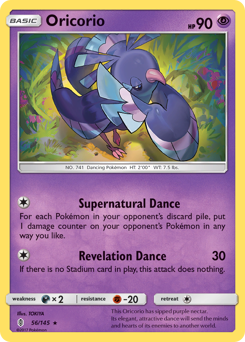

Image already exists: dataset\sm2\56.png


In [77]:
card = random_card(all_cards, True)
save_img(card, True)

In [ ]:
# save_all_img(all_cards, True) # save with debug log
save_all_img(all_cards)

Image already exists: dataset\hgss4\1.png
Image already exists: dataset\xy5\1.png
Image already exists: dataset\pl1\1.png
Image already exists: dataset\dp3\1.png
Image already exists: dataset\det1\1.png
Image already exists: dataset\dv1\1.png
Image already exists: dataset\mcd19\1.png
Image already exists: dataset\pl3\1.png
Image already exists: dataset\ex12\1.png
Image already exists: dataset\ex3\1.png
Image already exists: dataset\ru1\1.png
Image already exists: dataset\ecard2\H1.png
Image already exists: dataset\base4\1.png
Image already exists: dataset\hgss1\1.png
Image already exists: dataset\ex11\1.png
Image already exists: dataset\ex7\1.png
Image already exists: dataset\gym1\1.png
Image already exists: dataset\base3\1.png
Image already exists: dataset\sm9\1.png
Image already exists: dataset\xy2\1.png
Image already exists: dataset\pop6\1.png
Image already exists: dataset\ecard2\H2.png
Image already exists: dataset\hgss4\2.png
Image already exists: dataset\pl1\2.png
Image already e

In [37]:
set_list = pokemontcgsdk.Set.all()
set_list = [s.id for s in set_list]
np.array(set_list)

array(['base1', 'base2', 'basep', 'base3', 'base4', 'base5', 'gym1',
       'gym2', 'neo1', 'neo2', 'si1', 'neo3', 'neo4', 'base6', 'ecard1',
       'ecard2', 'ecard3', 'ex1', 'ex2', 'ex3', 'np', 'ex4', 'ex5', 'ex6',
       'pop1', 'ex7', 'ex8', 'ex9', 'ex10', 'pop2', 'ex11', 'ex12',
       'pop3', 'ex13', 'ex14', 'pop4', 'ex15', 'pop5', 'ex16', 'dp1',
       'dpp', 'dp2', 'pop6', 'dp3', 'dp4', 'pop7', 'dp5', 'dp6', 'pop8',
       'dp7', 'pl1', 'pop9', 'pl2', 'pl3', 'pl4', 'ru1', 'hgss1', 'hsp',
       'hgss2', 'hgss3', 'hgss4', 'col1', 'bwp', 'bw1', 'mcd11', 'bw2',
       'bw3', 'bw4', 'bw5', 'mcd12', 'bw6', 'dv1', 'bw7', 'bw8', 'bw9',
       'bw10', 'xyp', 'bw11', 'xy0', 'xy1', 'xy2', 'xy3', 'xy4', 'xy5',
       'dc1', 'xy6', 'xy7', 'xy8', 'xy9', 'g1', 'xy10', 'xy11', 'mcd16',
       'xy12', 'sm1', 'smp', 'sm2', 'sm3', 'sm35', 'sm4', 'sm5', 'sm6',
       'sm7', 'sm75', 'sm8', 'sm9', 'det1', 'sm10', 'sm11', 'sm115',
       'sma', 'mcd19', 'sm12', 'swshp', 'swsh1', 'swsh2', 'swsh3',
  